Чтение данных...
Прочитано 962001 точек
Диапазон x: [-4.00, 4.00]
Диапазон y: [-1.00, 5.00]
Диапазон w: [0.0000, 0.7537]
Интерполяция данных...
График сохранен как solution_visualization.png


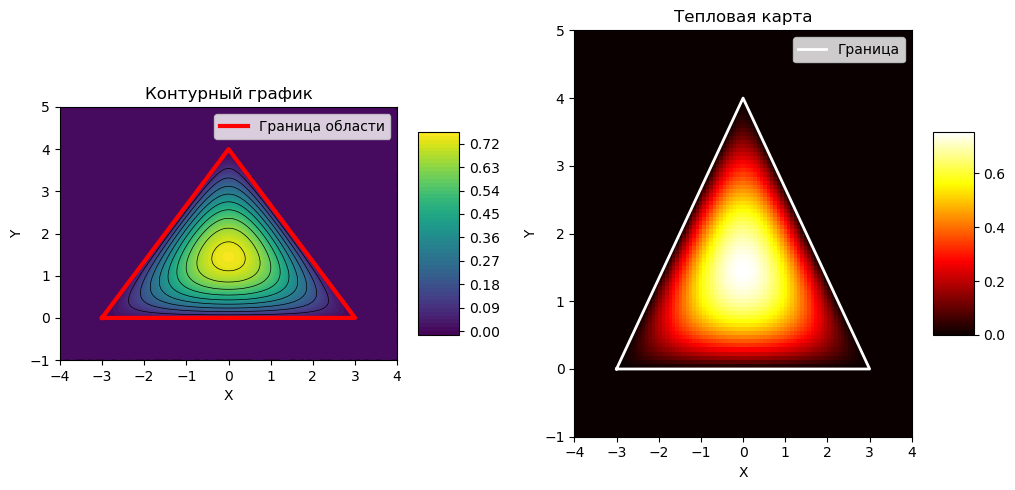

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Чтение данных из файла
print("Чтение данных...")
data = np.loadtxt('solution.txt', skiprows=1)
x = data[:, 0]
y = data[:, 1]
w = data[:, 2]

print(f"Прочитано {len(x)} точек")
print(f"Диапазон x: [{x.min():.2f}, {x.max():.2f}]")
print(f"Диапазон y: [{y.min():.2f}, {y.max():.2f}]")
print(f"Диапазон w: [{w.min():.4f}, {w.max():.4f}]")

# Создание регулярной сетки для визуализации
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Интерполяция на регулярную сетку
print("Интерполяция данных...")
zi = griddata((x, y), w, (xi, yi), method='cubic')

# Вершины треугольника для отрисовки
triangle_x = [-3, 3, 0, -3]
triangle_y = [0, 0, 4, 0]

# Создание графиков
fig = plt.figure(figsize=(15, 5))

# 1. Контурный график
ax2 = fig.add_subplot(132)
contour = ax2.contourf(xi, yi, zi, levels=50, cmap='viridis')
ax2.contour(xi, yi, zi, levels=10, colors='black', linewidths=0.5)
ax2.plot(triangle_x, triangle_y, 'r-', linewidth=3, label='Граница области')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Контурный график')
ax2.legend()
ax2.set_aspect('equal')
plt.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)

# 2. Тепловая карта
ax3 = fig.add_subplot(133)
im = ax3.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], 
               origin='lower', cmap='hot', aspect='auto')
ax3.plot(triangle_x, triangle_y, 'w-', linewidth=2, label='Граница')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Тепловая карта')
ax3.legend()
plt.colorbar(im, ax=ax3, shrink=0.5, aspect=5)

plt.tight_layout()
plt.savefig('solution_visualization.png', dpi=300, bbox_inches='tight')
print("График сохранен как solution_visualization.png")
plt.show()

Чтение данных...
Прочитано 1681 точек
Диапазон x: [-4.00, 4.00]
Диапазон y: [-1.00, 5.00]
Диапазон w: [0.0000, 0.7610]
Количество точек с w=0: 160
Количество точек с w≠0: 1521
Интерполяция данных...


/tmp/ipykernel_17127/580416126.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_binary = plt.cm.get_cmap('Set1', 2)


График сохранен как binary_solution_visualization.png


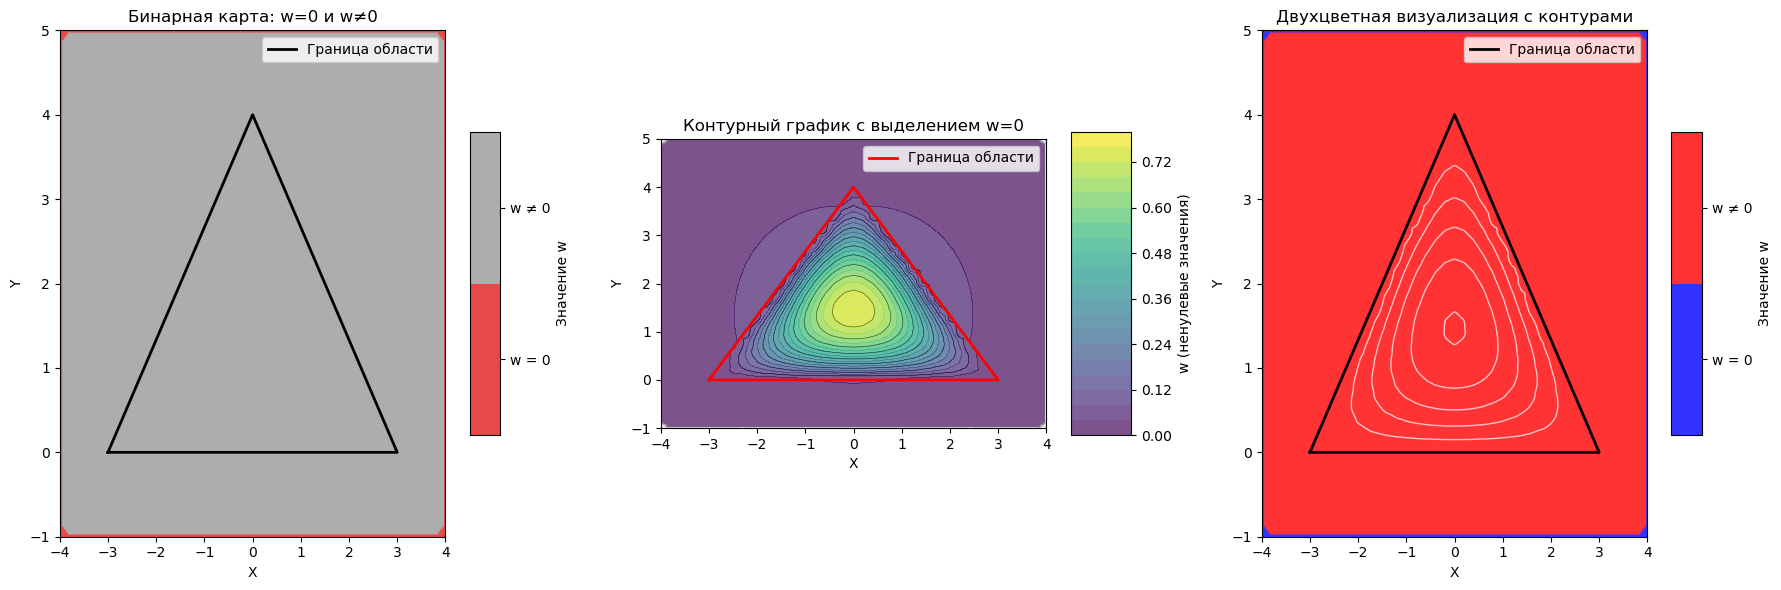


Дополнительная статистика:
Общее количество точек: 1681
Точек с w=0: 160 (9.5%)
Точек с w≠0: 1521 (90.5%)
Точек с |w| < 1e-10: 160 (9.5%)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Чтение данных из файла
print("Чтение данных...")
data = np.loadtxt('solution.txt', skiprows=1)
x = data[:, 0]
y = data[:, 1]
w = data[:, 2]

print(f"Прочитано {len(x)} точек")
print(f"Диапазон x: [{x.min():.2f}, {x.max():.2f}]")
print(f"Диапазон y: [{y.min():.2f}, {y.max():.2f}]")
print(f"Диапазон w: [{w.min():.4f}, {w.max():.4f}]")
print(f"Количество точек с w=0: {np.sum(w == 0)}")
print(f"Количество точек с w≠0: {np.sum(w != 0)}")

# Создание регулярной сетки для визуализации
xi = np.linspace(x.min(), x.max(), 200)
yi = np.linspace(y.min(), y.max(), 200)
xi, yi = np.meshgrid(xi, yi)

# Интерполяция на регулярную сетку
print("Интерполяция данных...")
zi = griddata((x, y), w, (xi, yi), method='linear')

# Создаем маску для разделения на две области: w=0 и w≠0
# Используем небольшой порог для учета численных погрешностей
threshold = 1e-10
zi_binary = np.where(np.abs(zi) < threshold, 0, 1)

# Вершины треугольника для отрисовки
triangle_x = [-3, 3, 0, -3]
triangle_y = [0, 0, 4, 0]

# Создание графиков
fig = plt.figure(figsize=(18, 6))

# 1. Бинарная карта: два цвета для w=0 и w≠0
ax1 = fig.add_subplot(131)
# Используем дискретную цветовую карту
cmap_binary = plt.cm.get_cmap('Set1', 2)
im1 = ax1.imshow(zi_binary, extent=[x.min(), x.max(), y.min(), y.max()], 
                origin='lower', cmap=cmap_binary, aspect='auto', alpha=0.8)
ax1.plot(triangle_x, triangle_y, 'k-', linewidth=2, label='Граница области')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Бинарная карта: w=0 и w≠0')
ax1.legend()

# Создаем кастомный colorbar для бинарной карты
cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.6, aspect=10)
cbar1.set_ticks([0.25, 0.75])
cbar1.set_ticklabels(['w = 0', 'w ≠ 0'])
cbar1.set_label('Значение w')

# 2. Контурный график с выделением нулевых значений
ax2 = fig.add_subplot(132)
# Создаем маску для нулевых значений
zero_mask = np.abs(zi) < threshold

# Рисуем фон для ненулевых значений
contour_nonzero = ax2.contourf(xi, yi, np.where(zero_mask, np.nan, zi), 
                              levels=20, cmap='viridis', alpha=0.7)

# Закрашиваем нулевые значения отдельным цветом
ax2.contourf(xi, yi, zero_mask, levels=[0.5, 1.5], colors=['lightgray'], alpha=0.5)

# Добавляем контуры
ax2.contour(xi, yi, zi, levels=10, colors='black', linewidths=0.5, alpha=0.5)
ax2.plot(triangle_x, triangle_y, 'r-', linewidth=2, label='Граница области')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Контурный график с выделением w=0')
ax2.legend()
ax2.set_aspect('equal')
plt.colorbar(contour_nonzero, ax=ax2, shrink=0.6, aspect=5, label='w (ненулевые значения)')

# 3. Комбинированная визуализация
ax3 = fig.add_subplot(133)
# Создаем кастомную цветовую карту с двумя четкими цветами
from matplotlib.colors import ListedColormap
colors_combined = ['blue', 'red']  # синий для w=0, красный для w≠0
cmap_combined = ListedColormap(colors_combined)

# Масштабируем значения для лучшего отображения
zi_scaled = np.where(np.abs(zi) < threshold, 0, 1)

im3 = ax3.imshow(zi_scaled, extent=[x.min(), x.max(), y.min(), y.max()], 
                origin='lower', cmap=cmap_combined, aspect='auto', alpha=0.8)

# Добавляем контуры ненулевых значений поверх
if np.any(~zero_mask):
    contour_overlay = ax3.contour(xi, yi, np.where(zero_mask, np.nan, zi), 
                                 levels=5, colors='white', linewidths=1, alpha=0.7)

ax3.plot(triangle_x, triangle_y, 'black', linewidth=2, label='Граница области')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Двухцветная визуализация с контурами')
ax3.legend()

# Кастомный colorbar для комбинированной визуализации
cbar3 = plt.colorbar(im3, ax=ax3, shrink=0.6, aspect=10)
cbar3.set_ticks([0.25, 0.75])
cbar3.set_ticklabels(['w = 0', 'w ≠ 0'])
cbar3.set_label('Значение w')

plt.tight_layout()
plt.savefig('binary_solution_visualization.png', dpi=300, bbox_inches='tight')
print("График сохранен как binary_solution_visualization.png")
plt.show()

# Дополнительная статистика
print("\nДополнительная статистика:")
print(f"Общее количество точек: {len(w)}")
print(f"Точек с w=0: {np.sum(w == 0)} ({np.sum(w == 0)/len(w)*100:.1f}%)")
print(f"Точек с w≠0: {np.sum(w != 0)} ({np.sum(w != 0)/len(w)*100:.1f}%)")

# Проверяем с небольшим порогом для учета численных погрешностей
w_near_zero = np.sum(np.abs(w) < 1e-10)
print(f"Точек с |w| < 1e-10: {w_near_zero} ({w_near_zero/len(w)*100:.1f}%)")

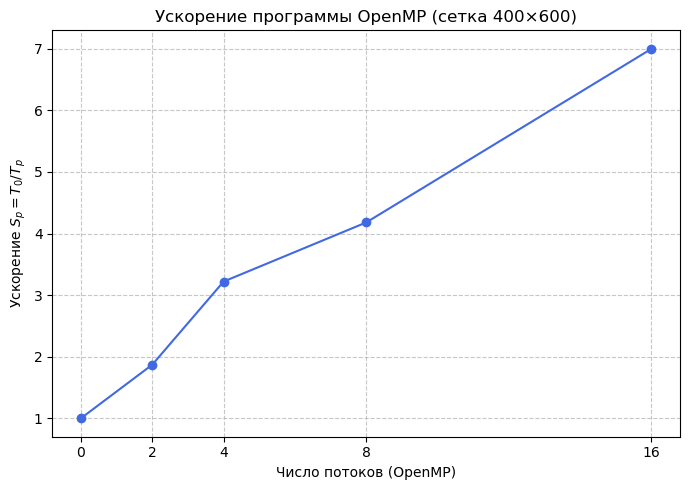

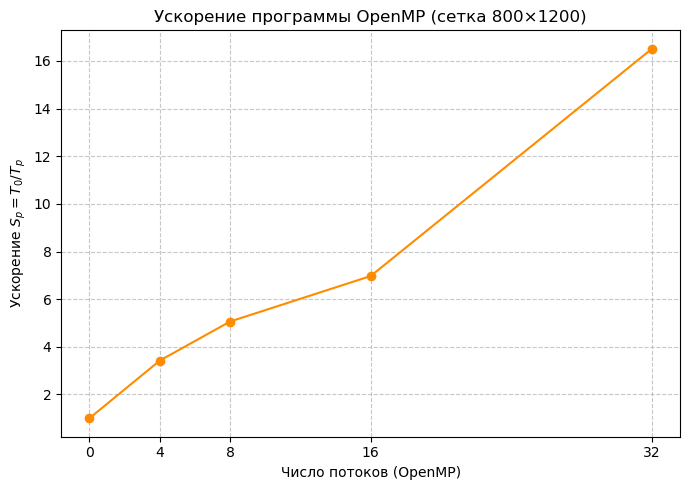

In [2]:
import matplotlib.pyplot as plt

# -------------------------------
# Данные из отчёта
# -------------------------------

# Сетка 400×600
threads_400 = [0, 2, 4, 8, 16]
speedup_400 = [1.0, 1.87, 3.22, 4.18, 7.00]

# Сетка 800×1200
threads_800 = [0, 4, 8, 16, 32]
speedup_800 = [1.0, 3.42, 5.06, 6.97, 16.51]

# -------------------------------
# График 1 — для сетки 400×600
# -------------------------------
plt.figure(figsize=(7, 5))
plt.plot(threads_400, speedup_400, marker='o', linestyle='-', color='royalblue')
plt.title('Ускорение программы OpenMP (сетка 400×600)')
plt.xlabel('Число потоков (OpenMP)')
plt.ylabel('Ускорение $S_p = T_0 / T_p$')
plt.xticks(threads_400)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('speedup_400x600.png', dpi=300)
plt.show()

# -------------------------------
# График 2 — для сетки 800×1200
# -------------------------------
plt.figure(figsize=(7, 5))
plt.plot(threads_800, speedup_800, marker='o', linestyle='-', color='darkorange')
plt.title('Ускорение программы OpenMP (сетка 800×1200)')
plt.xlabel('Число потоков (OpenMP)')
plt.ylabel('Ускорение $S_p = T_0 / T_p$')
plt.xticks(threads_800)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('speedup_800x1200.png', dpi=300)
plt.show()



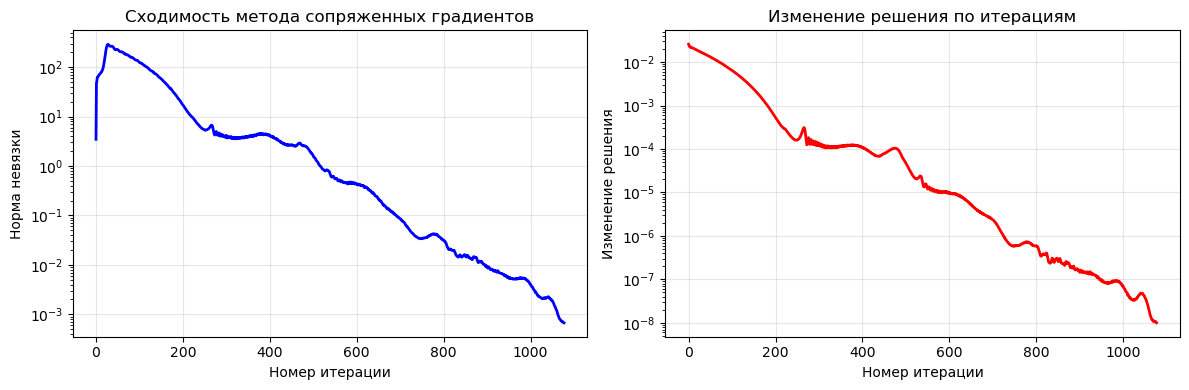

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Чтение истории сходимости
data = np.loadtxt('convergence_history.txt', skiprows=1)
iterations = data[:, 0]
residuals = data[:, 1]
solution_changes = data[:, 2]

# График сходимости
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.semilogy(iterations, residuals, 'b-', linewidth=2)
plt.xlabel('Номер итерации')
plt.ylabel('Норма невязки')
plt.title('Сходимость метода сопряженных градиентов')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogy(iterations, solution_changes, 'r-', linewidth=2)
plt.xlabel('Номер итерации')
plt.ylabel('Изменение решения')
plt.title('Изменение решения по итерациям')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('convergence_plot.png')
plt.show()



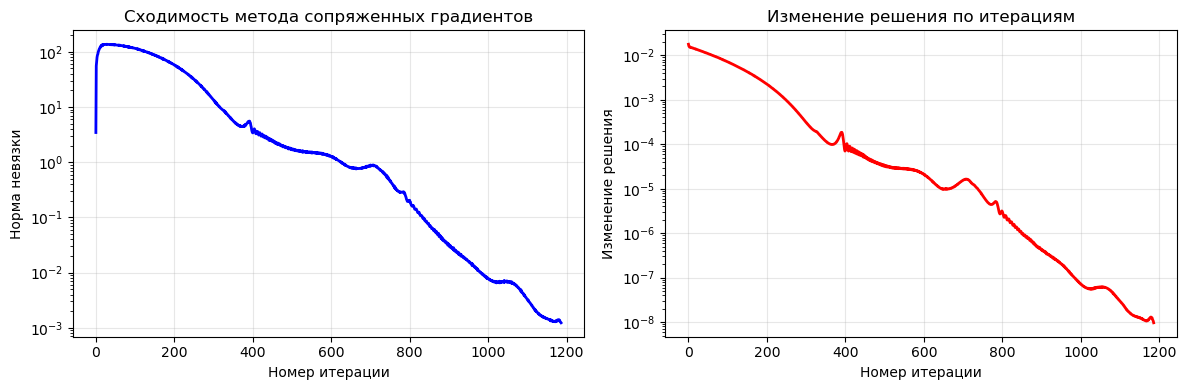

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Чтение истории сходимости
data = np.loadtxt('convergence_history.txt', skiprows=1)
iterations = data[:, 0]
residuals = data[:, 1]
solution_changes = data[:, 2]

# График сходимости
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.semilogy(iterations, residuals, 'b-', linewidth=2)
plt.xlabel('Номер итерации')
plt.ylabel('Норма невязки')
plt.title('Сходимость метода сопряженных градиентов')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.semilogy(iterations, solution_changes, 'r-', linewidth=2)
plt.xlabel('Номер итерации')
plt.ylabel('Изменение решения')
plt.title('Изменение решения по итерациям')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('convergence_plot.png')
plt.show()



Чтение данных...
Прочитано 241001 точек
Диапазон x: [-3.00, 3.00]
Диапазон y: [-0.00, 4.00]
Диапазон w: [0.0000, 0.7522]
Интерполяция данных...
График сохранен как solution_visualization.png


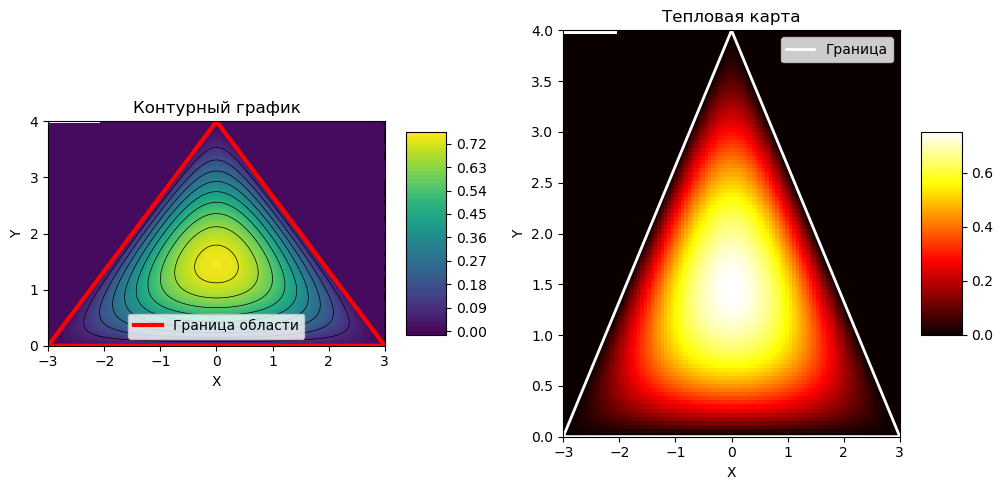

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Чтение данных из файла
print("Чтение данных...")
data = np.loadtxt('solution.txt', skiprows=1)
x = data[:, 0]
y = data[:, 1]
w = data[:, 2]

print(f"Прочитано {len(x)} точек")
print(f"Диапазон x: [{x.min():.2f}, {x.max():.2f}]")
print(f"Диапазон y: [{y.min():.2f}, {y.max():.2f}]")
print(f"Диапазон w: [{w.min():.4f}, {w.max():.4f}]")

# Создание регулярной сетки для визуализации
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Интерполяция на регулярную сетку
print("Интерполяция данных...")
zi = griddata((x, y), w, (xi, yi), method='cubic')

# Вершины треугольника для отрисовки
triangle_x = [-3, 3, 0, -3]
triangle_y = [0, 0, 4, 0]

# Создание графиков
fig = plt.figure(figsize=(15, 5))

# 1. Контурный график
ax2 = fig.add_subplot(132)
contour = ax2.contourf(xi, yi, zi, levels=50, cmap='viridis')
ax2.contour(xi, yi, zi, levels=10, colors='black', linewidths=0.5)
ax2.plot(triangle_x, triangle_y, 'r-', linewidth=3, label='Граница области')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Контурный график')
ax2.legend()
ax2.set_aspect('equal')
plt.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)

# 2. Тепловая карта
ax3 = fig.add_subplot(133)
im = ax3.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], 
               origin='lower', cmap='hot', aspect='auto')
ax3.plot(triangle_x, triangle_y, 'w-', linewidth=2, label='Граница')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Тепловая карта')
ax3.legend()
plt.colorbar(im, ax=ax3, shrink=0.5, aspect=5)

plt.tight_layout()
plt.savefig('solution_visualization.png', dpi=300, bbox_inches='tight')
print("График сохранен как solution_visualization.png")
plt.show()
